In [162]:
#                                                      Task 1: Exploratory Data Analysis (EDA)

In [163]:
#    a.	Load the dataset and perform fundamental data exploration.

In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
data=pd.read_csv("A10.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [165]:
data.isnull().sum()

Drug Dosage (mg)                  0
Systolic Blood Pressure (mmHg)    0
Heart Rate (BPM)                  0
Liver Toxicity Index (U/L)        0
Blood Glucose Level (mg/dL)       0
Drug Response                     0
dtype: int64

In [166]:
(data==0).sum()

Drug Dosage (mg)                    0
Systolic Blood Pressure (mmHg)      0
Heart Rate (BPM)                    0
Liver Toxicity Index (U/L)          0
Blood Glucose Level (mg/dL)         0
Drug Response                     240
dtype: int64

In [167]:
num_cols=data.select_dtypes(include=['float64']).columns

# STANDARD SCALAR

from sklearn.preprocessing import StandardScaler


ss=StandardScaler()
data[num_cols]=ss.fit_transform(data[num_cols])

print("Standard Scaling : ")
data.head()

Standard Scaling : 


,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.092732,0.070867,-2.002791,0.206990,-0.631013,1
1,-1.847387,2.126409,-1.022016,2.855174,-0.557178,1
2,-1.240800,-1.409406,0.309741,-0.385545,0.369541,0
3,2.074016,-1.089396,-0.854298,0.934898,-0.662906,1
4,0.423799,0.259527,-0.094885,1.869634,-0.802079,1


In [168]:
#    b.	Utilize histograms, box plots, or density plots to understand feature distributions.

array([[<Axes: title={'center': 'Drug Dosage (mg)'}>,
        <Axes: title={'center': 'Systolic Blood Pressure (mmHg)'}>],
       [<Axes: title={'center': 'Heart Rate (BPM)'}>,
        <Axes: title={'center': 'Liver Toxicity Index (U/L)'}>],
       [<Axes: title={'center': 'Blood Glucose Level (mg/dL)'}>,
        <Axes: title={'center': 'Drug Response'}>]], dtype=object)

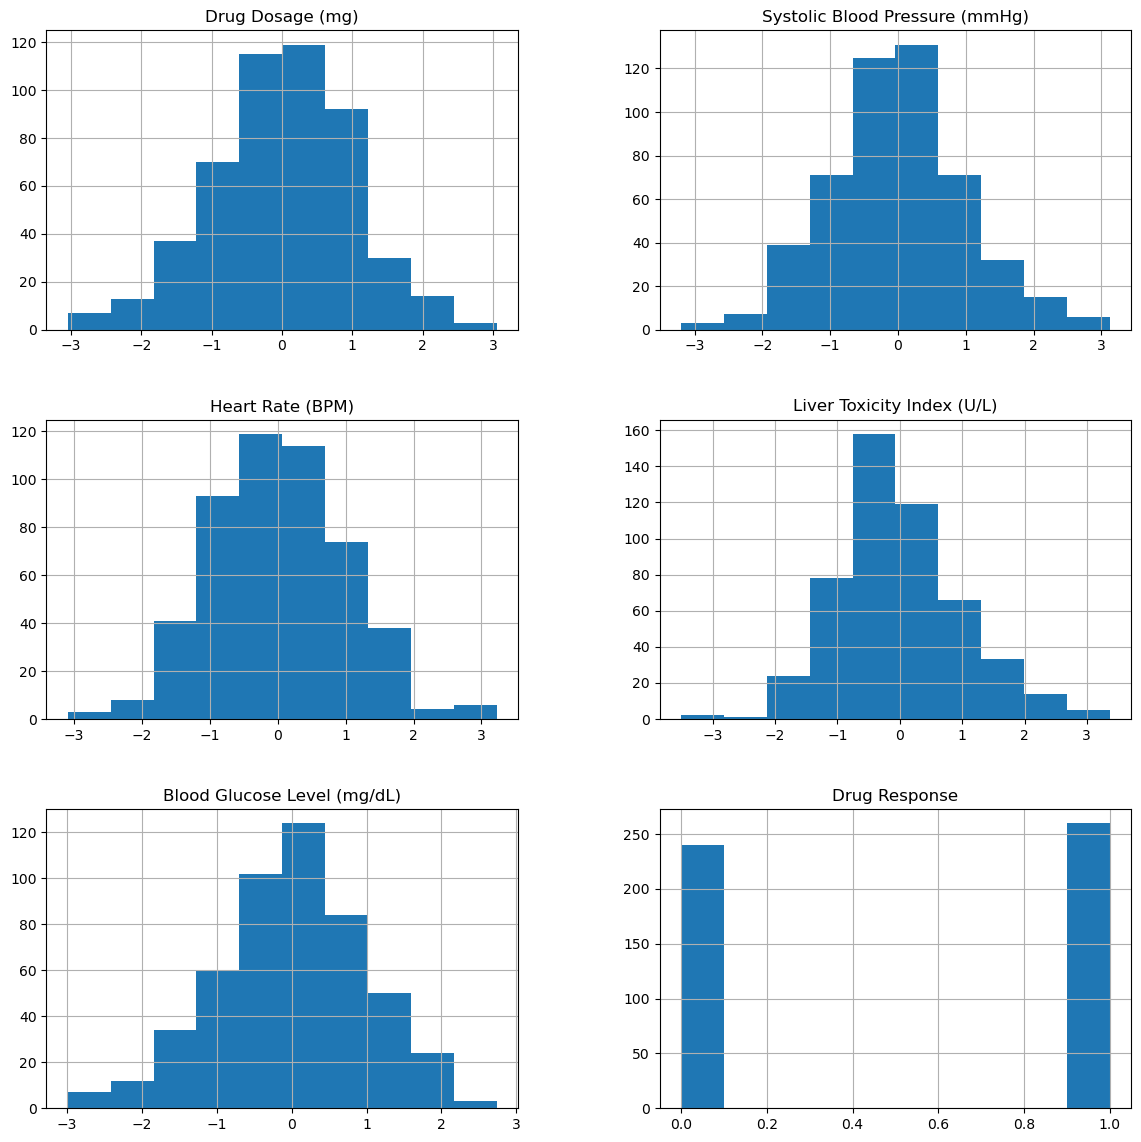

In [169]:
data.hist(figsize=(14,14))

In [170]:
#   c.	Investigate feature correlations to discern relationships within the data.

In [171]:
data.corr()['Drug Response'].abs().sort_values(ascending=False)

Drug Response                     1.000000
Liver Toxicity Index (U/L)        0.434722
Systolic Blood Pressure (mmHg)    0.305226
Blood Glucose Level (mg/dL)       0.169342
Drug Dosage (mg)                  0.043457
Heart Rate (BPM)                  0.009715
Name: Drug Response, dtype: float64

In [172]:
#                                                            Task 3: Data Visualization

In [173]:
#    a.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.

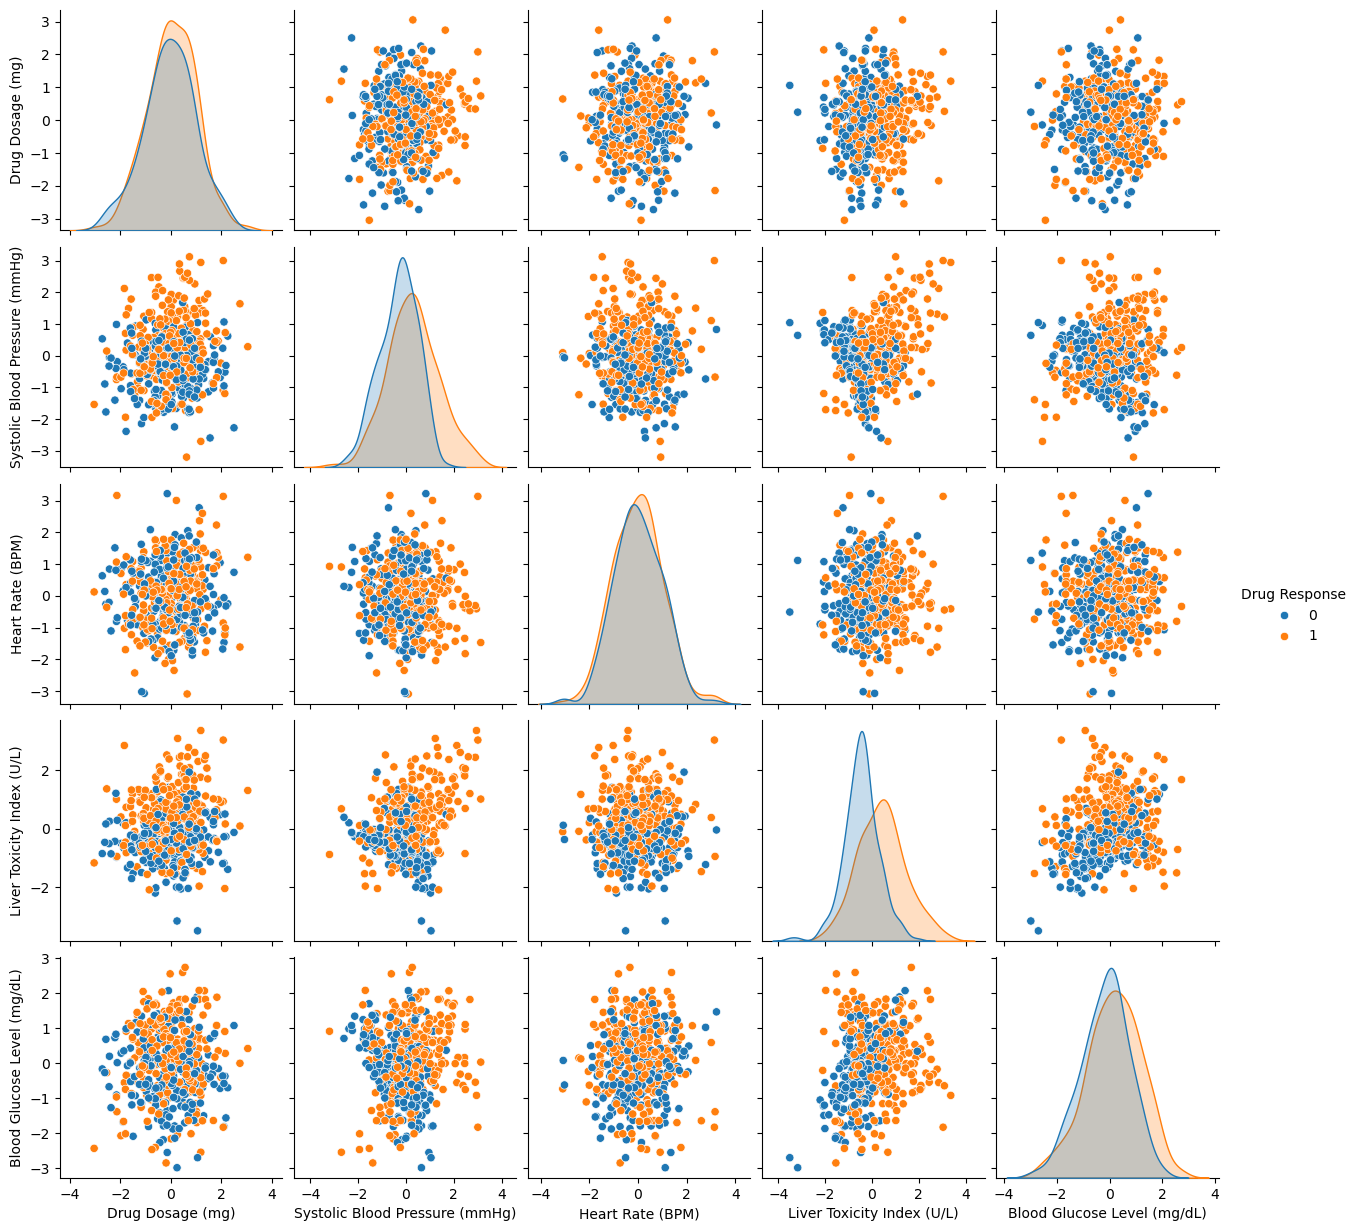

In [174]:
import matplotlib.pyplot as plt
'''
for col in x.columns:
    plt.scatter(data[col],y)
    plt.title(col)
    plt.show()

'''
 #  or
sns.pairplot(data, hue='Drug Response')
plt.show()

In [175]:
#    b.	Visualize class distributions to gauge dataset balance or imbalance.

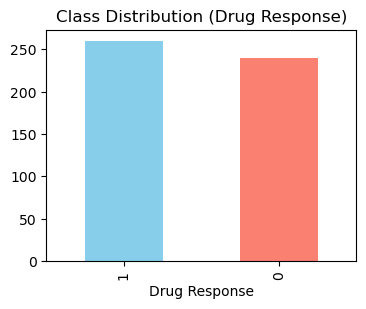

In [176]:
# Distribution of target class
plt.figure(figsize=(4,3))
data['Drug Response'].value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.title("Class Distribution (Drug Response)")
plt.show()

In [177]:
#                                                           Task 2: Data Preprocessing

In [178]:
#    a.	Encode categorical variables if necessary.
''' There are no categorical values in the dataset'''

' There are no categorical values in the dataset'

In [179]:
#    b.	Split the dataset into training and testing sets.

In [180]:
from sklearn.model_selection import train_test_split,ShuffleSplit,StratifiedShuffleSplit,KFold

x=data.drop(columns='Drug Response')
y=data['Drug Response']

x_train,x_test,y_train,y_test=train_test_split(x , y , test_size=0.20 ,random_state=200)     

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 5)
(100, 5)
(400,)
(100,)


In [181]:
#                                                     Task 4: SVM Implementation

In [182]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

train_res = {}
test_res = {}

m=['linear', 'poly', 'rbf', 'sigmoid']
for j in m:
    model=SVC(kernel=j)
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    train_acc = np.round(accuracy_score(y_train, y_pred_train),2)
    test_acc = np.round(accuracy_score(y_test,y_pred_test),2)
    train_res[j] = train_acc
    test_res[j] = test_acc

print("================ MODEL-1 ================")
print("Training score :\n", train_res)
print("Test scores :\n", test_res)

================ MODEL-1 ================
Training score :
 {'linear': np.float64(0.73), 'poly': np.float64(0.75), 'rbf': np.float64(0.8), 'sigmoid': np.float64(0.67)}
Test scores :
 {'linear': np.float64(0.72), 'poly': np.float64(0.7), 'rbf': np.float64(0.75), 'sigmoid': np.float64(0.71)}


In [183]:
#By observing the score results, we get to know that RBF gives better results. 
#so, we'll go with (RBF) Radial basis classifier with different c values 
#via cross-validation to get better results



In [184]:
#cross validation 
#using stratified method
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, stratify = y,random_state=200)
#SVM Implementation
from sklearn.svm import SVC
model = SVC(kernel='rbf',C=10) #c=0.1, 1, 10(best)
model.fit(x_train,y_train)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("================ MODEL-1 ================")
print("Training score :\n",np.round(accuracy_score(y_train, model.predict(x_train)),2))
print("Test scores :\n", np.round(accuracy_score(y_test, model.predict(x_test)),2))

print("================ Confusion Matrix ================")
print("Train : \n" ,confusion_matrix(y_train, y_pred_train))
print("Test : \n" ,confusion_matrix(y_test, y_pred_test))

print("================ Other Metrics ================")
print("Train : \n" ,classification_report(y_train, y_pred_train))
print("Test : \n" ,classification_report(y_test, y_pred_test))

================ MODEL-1 ================
Training score :
 0.87
Test scores :
 0.77
================ Confusion Matrix ================
Train : 
 [[103  89]
 [104 104]]
Test : 
 [[29 19]
 [32 20]]
================ Other Metrics ================
Train : 
               precision    recall  f1-score   support

           0       0.50      0.54      0.52       192
           1       0.54      0.50      0.52       208

    accuracy                           0.52       400
   macro avg       0.52      0.52      0.52       400
weighted avg       0.52      0.52      0.52       400

Test : 
               precision    recall  f1-score   support

           0       0.48      0.60      0.53        48
           1       0.51      0.38      0.44        52

    accuracy                           0.49       100
   macro avg       0.49      0.49      0.49       100
weighted avg       0.49      0.49      0.48       100



In [185]:
#cross validation 
# Set up K-Fold cross-validator
from sklearn.model_selection import ShuffleSplit, cross_validate

kf = ShuffleSplit(n_splits=5,test_size=0.2,random_state=200)
model = SVC(kernel='rbf',C=10) 

cv_results = cross_validate(model, x, y, cv=kf, scoring='accuracy', return_train_score=True)
print("================ MODEL-1 ================")
print("Mean Train Accuracy:", np.round(cv_results['train_score'].mean(), 2))
print("Mean Test Accuracy:", np.round(cv_results['test_score'].mean(), 2))


================ MODEL-1 ================
Mean Train Accuracy: 0.87
Mean Test Accuracy: 0.75


In [186]:
#still will try to build best model
#By reducing X features with respective Y and X features correlation

<Axes: >

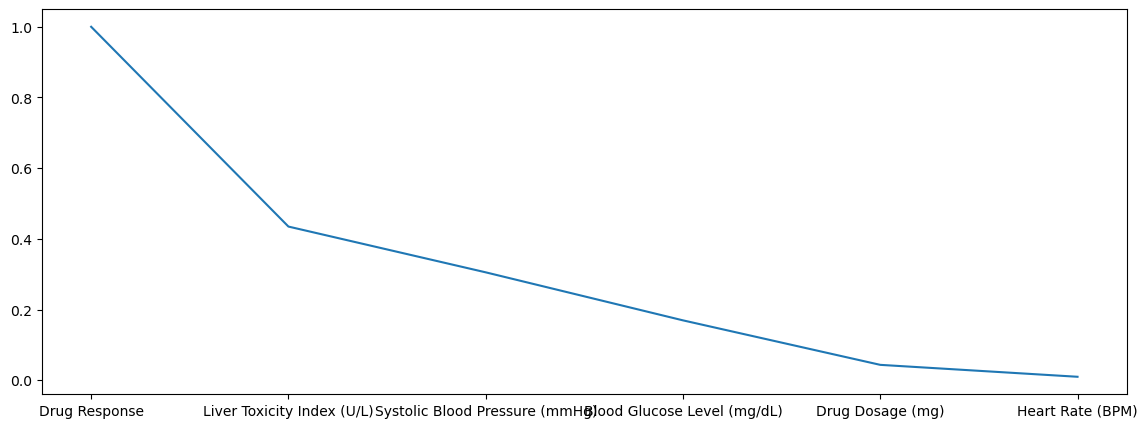

In [187]:
#correlation with Drug Response (target)
data.corr()['Drug Response'].abs().sort_values(ascending=False).plot(figsize=(14,5))

In [188]:
# Defining features(x)
x = data.drop(columns=['Drug Response','Heart Rate (BPM)'])


In [189]:
#SVM Implementation
from sklearn.svm import SVC
kernels = ['linear', 'poly', 'rbf','sigmoid']
train_res = {}
test_res = {}

for k in kernels:
    model2 = SVC(kernel=k)
    model2.fit(x_train, y_train)
    # Predictions
    y_train_pred = model2.predict(x_train)
    y_test_pred = model2.predict(x_test)
    # Accuracy scores
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    train_acc = np.round(accuracy_score(y_train, model2.predict(x_train)),2)
    test_acc = np.round(accuracy_score(y_test, model2.predict(x_test)),2)
    train_res[k] = train_acc
    test_res[k] = test_acc
    
print("================ MODEL-2 ================")   
print("Training score :\n", train_res)
print("Test scores :\n", test_res)

================ MODEL-2 ================
Training score :
 {'linear': np.float64(0.72), 'poly': np.float64(0.76), 'rbf': np.float64(0.79), 'sigmoid': np.float64(0.66)}
Test scores :
 {'linear': np.float64(0.74), 'poly': np.float64(0.74), 'rbf': np.float64(0.78), 'sigmoid': np.float64(0.67)}


In [190]:
#splitting data into train and test with stratify cross validation 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, stratify = y,random_state=200)

#SVM Implementation
from sklearn.svm import SVC
model2 = SVC(kernel='rbf',C=100) #c=0.1, 1, 10, 100(best)
model2.fit(x_train,y_train)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("================ MODEL-2 ================")
print("Training score :\n",np.round(accuracy_score(y_train, model2.predict(x_train)),2))
print("Test scores :\n", np.round(accuracy_score(y_test, model2.predict(x_test)),2))

print("================ Confusion Matrix ================")
print("Train : \n" ,confusion_matrix(y_train, y_train_pred))
print("Test : \n" ,confusion_matrix(y_test, y_test_pred))

print("================ Other Metrics ================")
print("Train : \n" ,classification_report(y_train, y_train_pred))
print("Test : \n" ,classification_report(y_test, y_test_pred))

================ MODEL-2 ================
Training score :
 0.89
Test scores :
 0.82
================ Confusion Matrix ================
Train : 
 [[122  70]
 [ 67 141]]
Test : 
 [[34 14]
 [19 33]]
================ Other Metrics ================
Train : 
               precision    recall  f1-score   support

           0       0.65      0.64      0.64       192
           1       0.67      0.68      0.67       208

    accuracy                           0.66       400
   macro avg       0.66      0.66      0.66       400
weighted avg       0.66      0.66      0.66       400

Test : 
               precision    recall  f1-score   support

           0       0.64      0.71      0.67        48
           1       0.70      0.63      0.67        52

    accuracy                           0.67       100
   macro avg       0.67      0.67      0.67       100
weighted avg       0.67      0.67      0.67       100



In [ ]:
"""

================ MODEL-1 ================
Training score :
 0.87
Test scores :
 0.77

================ MODEL-2 ================
Training score :
 0.9
Test scores :
 0.82
 '''

In [ ]:
 #                                      ===================== Task 7: Comparison & Discussion =====================

In [ ]:
print("""
Linear kernel works well for linearly separable data.
RBF or polynomial kernels handle non-linear relationships.
Based on accuracy and F1, choose the kernel that balances bias and variance best.
SVMs are powerful but slower on large datasets and sensitive to scaling.
""")